In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
# Train data
train = datasets.MNIST("" , train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]) ) 
# Test data
test = datasets.MNIST("" , train= False, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

In [4]:
# Setting the sets for the class
trainset = torch.utils.data.DataLoader(train , batch_size =10 , shuffle = True)
testset = torch.utils.data.DataLoader(train , batch_size =10 , shuffle = True)

In [6]:
x,y = data[0][0], data[1][0]
print(y)

tensor(3)


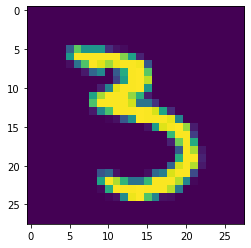

In [10]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()

In [8]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [16]:
# Getting how spreed the data is
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [17]:
for i in counter_dict:
    print("{}: {}".format(i , counter_dict[i]/total*100))

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [18]:
## Building the network

In [19]:
import torch.nn as nn # Object programing 
import torch.nn.functional as F

In [22]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # define layers
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 numbers of output
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1) #
     
        

net = Net()
print(net)
        
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [29]:
X =  torch.rand((28,28))
X = X.view(-1, 28*28)

In [30]:
output = net(X)

In [31]:
output

tensor([[-2.2442, -2.2456, -2.3600, -2.4354, -2.2398, -2.3458, -2.2198, -2.2877,
         -2.3627, -2.3065]], grad_fn=<LogSoftmaxBackward>)

In [39]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS =  10

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a back of featuresets and labels
        X, y = data 
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0185, grad_fn=<NllLossBackward>)
tensor(0.0579, grad_fn=<NllLossBackward>)
tensor(0.0077, grad_fn=<NllLossBackward>)
tensor(0.3017, grad_fn=<NllLossBackward>)
tensor(0.0601, grad_fn=<NllLossBackward>)
tensor(0.0016, grad_fn=<NllLossBackward>)
tensor(0.0224, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)
tensor(8.1940e-05, grad_fn=<NllLossBackward>)
tensor(4.2557e-06, grad_fn=<NllLossBackward>)


In [43]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy : {}".format(round(correct/total, 3)))

Accuracy : 0.99


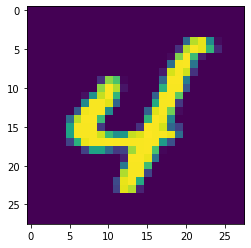

In [41]:
plt.imshow(X[0].view(28,28))
plt.show()